In [112]:
import numpy as np                   
import pandas as  pd            
from sklearn.datasets import load_iris


In [113]:
iris = load_iris()

In [114]:
X  = iris.data
y = iris.target
features_names = iris.feature_names
target_names = iris.target_names
df = pd.DataFrame(X, columns = features_names)
df['species'] = y

In [115]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [116]:
df['species'].unique()

array([0, 1, 2])

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [118]:
df = df.drop(df[df['species'] == 2].index)

In [119]:
df['species'].unique()

array([0, 1])

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   species            100 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 3.6 KB


In [121]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [122]:
df.drop('sepal length (cm)', axis=1, inplace=True)
df.drop('petal width (cm)', axis=1, inplace=True)

# df is updated directly; no need to reassign.
print(df.head())


   sepal width (cm)  petal length (cm)  species
0               3.5                1.4        0
1               3.0                1.4        0
2               3.2                1.3        0
3               3.1                1.5        0
4               3.6                1.4        0


In [123]:
df.sample(100)

,sepal width (cm),petal length (cm),species
46,3.8,1.6,0
76,2.8,4.8,1
63,2.9,4.7,1
12,3.0,1.4,0
98,2.5,3.0,1
...,...,...,...
82,2.7,3.9,1
61,3.0,4.2,1
67,2.7,4.1,1
31,3.4,1.5,0


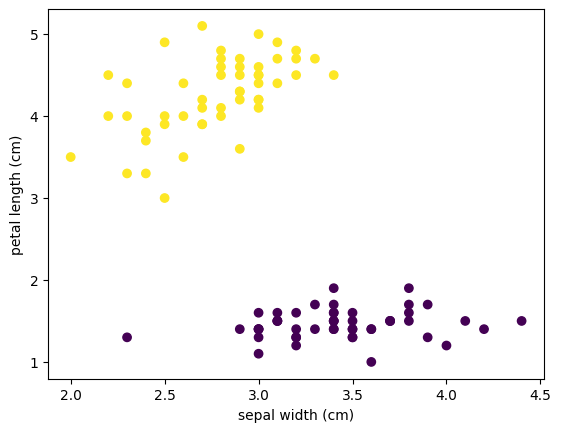

In [124]:
import matplotlib.pyplot as plt

plt.scatter(df['sepal width (cm)'], df['petal length (cm)'], c=df['species'])
plt.xlabel('sepal width (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [125]:
df_train = df.iloc[:60, :]
df_valid = df.iloc[60:80, :]
df_test = df.iloc[80:, :]

In [126]:
X_test = df_valid.drop('species', axis=1)
X_train = df_valid.iloc[:, :-1]

# Case 1 - Bagging

In [127]:
df_bag = df_train.sample(8, replace=True)
X_bag = df_bag.drop('species', axis=1)  
y_bag = df_bag['species']

In [128]:
df_bag

,sepal width (cm),petal length (cm),species
28,3.4,1.4,0
38,3.0,1.3,0
13,3.0,1.1,0
25,3.0,1.6,0
41,2.3,1.3,0
18,3.8,1.7,0
11,3.4,1.6,0
18,3.8,1.7,0


In [129]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [130]:
def evaluate(clf , X , y):
    clf.fit(X, y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf)
    y_pred = clf.predict(X_bag)
    print(accuracy_score(y_bag, y_pred))

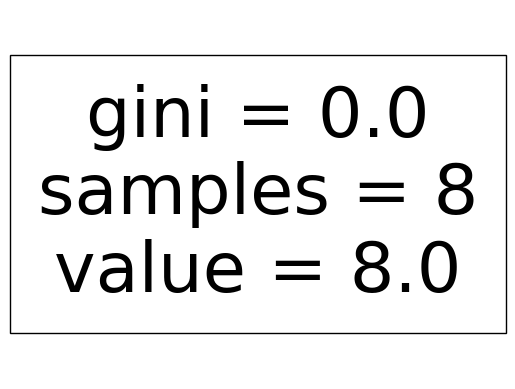

c:\Users\kirit\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  if get_config()["display"] != "diagram":


1.0


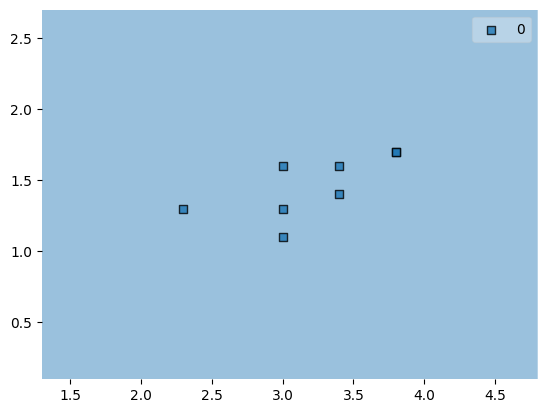

In [131]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1, X_bag, y_bag)